importing necessary libraries

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pickle

Read wetherAus dataset

In [53]:
df=pd.read_csv(r"D:\luminar\project dataset\weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


checking for missing Values

In [54]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

missing value handling

In [55]:
#droping columns with high missing values
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Location','Date'],axis=1,inplace=True)
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [56]:
#droping rows with missing values
df.dropna(inplace=True,axis=0)
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [57]:
#cheaking for missing value
df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [58]:
#checking data types
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [59]:
#checking unique values from object
features= ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for feature in features:
    print('*'*10,feature,'*'*10)
    print(df[feature].unique())
    print('-'*100)

********** WindGustDir **********
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
----------------------------------------------------------------------------------------------------
********** WindDir9am **********
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
----------------------------------------------------------------------------------------------------
********** WindDir3pm **********
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
----------------------------------------------------------------------------------------------------
********** RainToday **********
['No' 'Yes']
----------------------------------------------------------------------------------------------------
********** RainTomorrow **********
['No' 'Yes']
----------------------------------------------------------------------------------------------------


In [60]:
#maping wind directions
wind_dir = {'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}
df['WindGustDir'] = df['WindGustDir'].map(wind_dir)
df['WindDir9am'] = df['WindDir9am'].map(wind_dir)
df['WindDir3pm'] = df['WindDir3pm'].map(wind_dir)
#maping Rain data
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0,44.0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,1,44.0,4,2,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,2,46.0,0,2,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,3,24.0,12,14,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,0,41.0,8,11,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


splitting X and y

In [61]:
#splitting dataset for X
X=df.drop('RainTomorrow',axis=1)
X

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,0,44.0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,1,44.0,4,2,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,2,46.0,0,2,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,3,24.0,12,14,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,0,41.0,8,11,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,14,31.0,13,14,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0
145455,2.8,23.4,0.0,14,31.0,12,8,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0
145456,3.6,25.3,0.0,4,22.0,12,5,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0
145457,5.4,26.9,0.0,5,37.0,12,1,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0


In [62]:
#splitting dataset for y
y=df['RainTomorrow']
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 112925, dtype: int64

plots to understand dataset

<Axes: title={'center': 'Corrlation Heatmap'}>

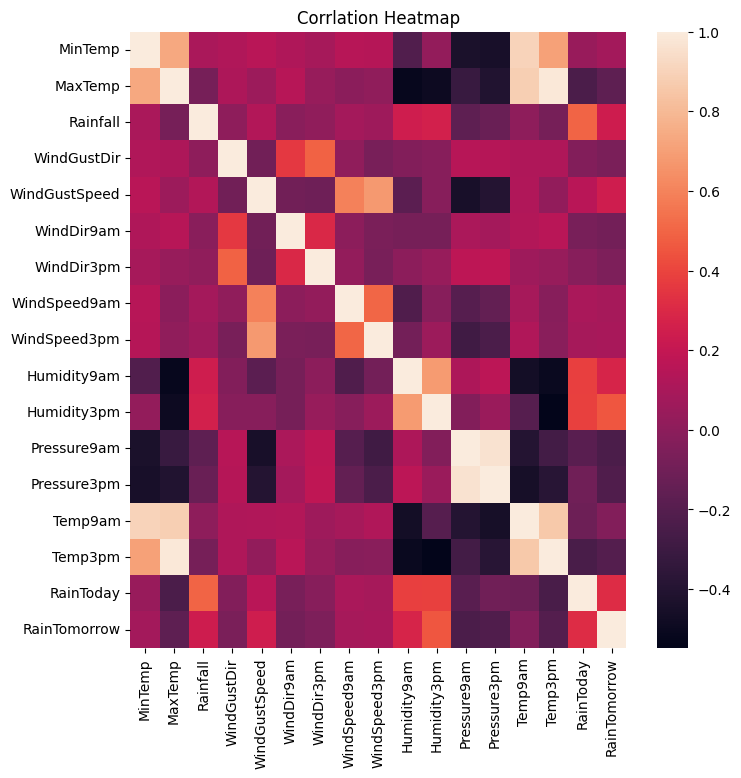

In [63]:
plt.figure(figsize=(8,8))
plt.title('Corrlation Heatmap')
sns.heatmap(df.corr(numeric_only=True))

<Axes: title={'center': 'MaxTemp vs MinTemp'}, xlabel='MaxTemp', ylabel='MinTemp'>

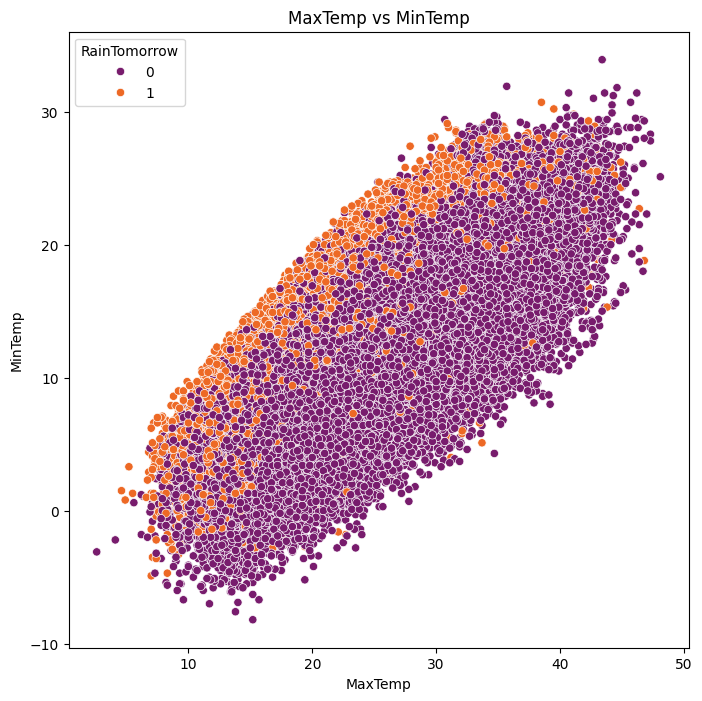

In [64]:
plt.figure(figsize=(8,8))
plt.title('MaxTemp vs MinTemp')
sns.scatterplot(x = 'MaxTemp',y='MinTemp',hue='RainTomorrow',palette='inferno',data=df)

<Axes: xlabel='WindGustSpeed', ylabel='MaxTemp'>

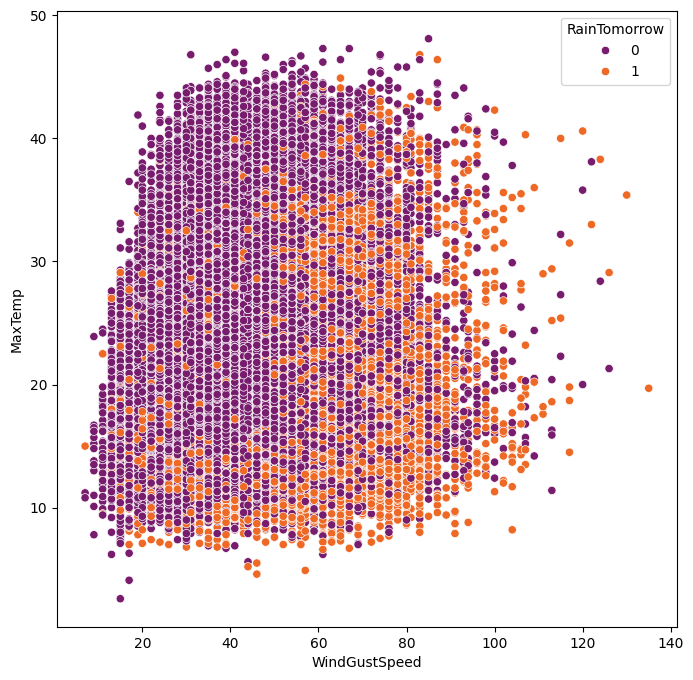

In [65]:
plt.figure(figsize=(8,8))
plt.title('WindGustspeed vs MaxTemp')
sns.scatterplot(x='WindGustSpeed',y = 'MaxTemp',hue='RainTomorrow',palette='inferno',data=df)

scaling the dataset

In [66]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

train test split

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [68]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
gb=GradientBoostingClassifier()
xgb=xgb.XGBClassifier()
ab=AdaBoostClassifier()
knn=KNeighborsClassifier()
svc=SVC()
models=[xgb,rf,dt,rf,gb,ab,knn,svc]
for i in models:
  print('*'*10,i,'*'*10)
  i.fit(X_train,y_train)
  print(classification_report(y_test,i.predict(X_test)))
  print('-'*50)

********** XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) **********
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26262
           1       0.74      0.55      0.63      7616

    accuracy                           0.85     33878
  

c:\Users\glavi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26262
           1       0.73      0.49      0.59      7616

    accuracy                           0.85     33878
   macro avg       0.80      0.72      0.75     33878
weighted avg       0.84      0.85      0.83     33878

--------------------------------------------------
********** KNeighborsClassifier() **********
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     26262
           1       0.68      0.47      0.56      7616

    accuracy                           0.83     33878
   macro avg       0.77      0.70      0.73     33878
weighted avg       0.82      0.83      0.82     33878

--------------------------------------------------
********** SVC() **********


In [ ]:
pickle.dump(xgb,open('model.pkl','wb'))

In [ ]:
pickle.dump(scaler,open('scaler.pkl','wb'))